In [91]:
import glob
import skimage
import os
from skimage import io
import matplotlib
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
import numpy as np
from tensorflow.contrib.layers import fully_connected
from tensorflow.contrib.metrics import f1_score
from skimage.transform import rescale, resize
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import sklearn.metrics
import time
from sklearn.utils import shuffle
from collections import Counter

In [92]:
dogs_races = glob.glob('/home/ficiu/Desktop/Train_data/Caini/Cu rasa/*')
cats_races = glob.glob('/home/ficiu/Desktop/Train_data/Pisici/Cu rasa/*')
dogs_without_race=glob.glob('/home/ficiu/Desktop/Train_data/Caini/Fara rasa/*')
cats_without_race=glob.glob('/home/ficiu/Desktop/Train_data/Pisici/Fara rasa/*')
print(len(dogs_races),len(cats_races))

127 12


In [93]:
def appendingFunction(X_dataset,y_dataset,thelist):
    for each in thelist:
        for i in glob.glob(each+'*'):
            X_dataset.append(i)
            y_races.append(each.split('/')[-1])
    return X_dataset,y_dataset

In [94]:
X_cats_dogs=[]
y_cats_dogs=[]

X_races=[]
y_races=[]
z_races=[]

X_races,y_races=appendingFunction(X_races,y_races,dogs_races)
X_races,y_races=appendingFunction(X_races,y_races,cats_races)

In [95]:
print(len(X_races),len(y_races))

139 139


In [97]:
count_dogs=0
count_cats=0
for each in dogs_races:
    for i in glob.glob(each+'/*'):
        X_cats_dogs.append(i)
        y_cats_dogs.append('1')
        count_dogs+=1
        
for each in cats_races:
    for i in glob.glob(each+'/*'):
        X_cats_dogs.append(i)
        y_cats_dogs.append('0')
        count_cats+=1
        
for each in dogs_without_race:
    X_cats_dogs.append(each)
    y_cats_dogs.append('1')
    count_dogs+=1

for each in cats_without_race:
    X_cats_dogs.append(each)
    y_cats_dogs.append('0')
    count_cats+=1

    
print(count_dogs,count_cats)
X_cats_dogs, y_cats_dogs = shuffle(X_cats_dogs, y_cats_dogs)
X_cats_dogs=X_cats_dogs
y_cats_dogs=y_cats_dogs

48427 24933


In [84]:
X_races=X_races[:138]
y_races=y_races[:138]

In [85]:
y_races1=y_races[0]
for each in y_races[1:]:
    y_races1=y_races1+' '+each
print(y_races1)

redbone bordercollie irishsetter airedale pomeranian doberman germanshepherd englishspringer samoyed afghanhound walkerhound boxer bloodhound pembroke bernesemountaindog bullmastiff dhole leonberg entlebucher americanstaffordshireterrier germanshorthaired labradorretriever affenpinscher pekinese borzoi saintbernard basset greatdane borderterrier irishterrier lakelandterrier toypoodle flat-coatedretriever goldenretriever malamute groenendael tibetanmastiff malinois appenzeller brabancongriffon americanpitbullterrier sealyhamterrier chow otterhound curly-coatedretriever englishsetter mexicanhairless bluetick chesapeakebayretriever siberianhusky wire-hairedfoxterrier shetlandsheepdog saluki welshspringerspaniel greatpyrenees weimaraner clumber newfoundland irishwaterspaniel rhodesianridgeback gordonsetter komondor toyterrier bostonbull frenchbulldog collie dingo havanese blenheimspaniel yorkshireterrier kuvasz americanbulldog miniaturepoodle japanesechin keeshond standardpoodle scottishde

In [86]:
y_races1

'redbone bordercollie irishsetter airedale pomeranian doberman germanshepherd englishspringer samoyed afghanhound walkerhound boxer bloodhound pembroke bernesemountaindog bullmastiff dhole leonberg entlebucher americanstaffordshireterrier germanshorthaired labradorretriever affenpinscher pekinese borzoi saintbernard basset greatdane borderterrier irishterrier lakelandterrier toypoodle flat-coatedretriever goldenretriever malamute groenendael tibetanmastiff malinois appenzeller brabancongriffon americanpitbullterrier sealyhamterrier chow otterhound curly-coatedretriever englishsetter mexicanhairless bluetick chesapeakebayretriever siberianhusky wire-hairedfoxterrier shetlandsheepdog saluki welshspringerspaniel greatpyrenees weimaraner clumber newfoundland irishwaterspaniel rhodesianridgeback gordonsetter komondor toyterrier bostonbull frenchbulldog collie dingo havanese blenheimspaniel yorkshireterrier kuvasz americanbulldog miniaturepoodle japanesechin keeshond standardpoodle scottishd

In [87]:
X_final=[]
y_final=[]
for each in X_races:
    list_pictures=glob.glob(each+'/*')
    for each1 in list_pictures:
        X_final.append(each1)
        y_final.append(y_races.index(each1.split('/')[-2]))
Counter(y_final)

Counter({0: 148,
         1: 150,
         2: 155,
         3: 202,
         4: 419,
         5: 150,
         6: 152,
         7: 159,
         8: 418,
         9: 239,
         10: 153,
         11: 351,
         12: 187,
         13: 181,
         14: 218,
         15: 156,
         16: 150,
         17: 410,
         18: 202,
         19: 164,
         20: 352,
         21: 171,
         22: 150,
         23: 149,
         24: 151,
         25: 370,
         26: 375,
         27: 156,
         28: 172,
         29: 169,
         30: 197,
         31: 151,
         32: 152,
         33: 150,
         34: 178,
         35: 150,
         36: 152,
         37: 150,
         38: 151,
         39: 153,
         40: 200,
         41: 202,
         42: 196,
         43: 151,
         44: 151,
         45: 361,
         46: 155,
         47: 171,
         48: 167,
         49: 192,
         50: 157,
         51: 157,
         52: 200,
         53: 150,
         54: 413,
         55: 160,
  

In [1414]:
def test_echilibrate(X_batch,y_batch):
    appearences=Counter(y_batch)
    prev=appearences[0]
    balanced=True
    for each in appearences:
        if(appearences[each]!=appearences[prev]):
            balanced=True
            break
    return balanced

In [88]:
def echilibrate_dataset(X_batch1 ,y_batch1):
    X_batch=X_batch1.copy()
    y_batch=y_batch1.copy()
    X_batch.append('/home/ficiu/Desktop/Train_data/Caini/Cu rasa/asdasdadasdasdassdasd/8.jpg')
    y_batch.append('asdasdadasdasdassdasd')
    appearences=Counter(y_batch)
    howMany=0
    for each in appearences:
        if(appearences[each]>howMany):
            howMany=appearences[each]
    
    count=1
    locationPrev=0
    current=X_batch[0]
    for i in X_batch[1:]:
        current1=i
        prev=current.split('/')[-2]
        now=current1.split('/')[-2]
        if(prev==now) and (current1!=X_batch[-1]):
            count+=1
        else :
            j=locationPrev
            while(count<howMany):
                X_batch.append(X_batch[j])
                y_batch.append(y_batch[j])
                j+=1
                count+=1
                if(j>=X_batch.index(current1)):
                    j=locationPrev
            
            current=current1
            locationPrev=X_batch.index(current1)
            count=1
    X_batch.remove('/home/ficiu/Desktop/Train_data/Caini/Cu rasa/asdasdadasdasdassdasd/8.jpg')
    y_batch.remove('asdasdadasdasdassdasd')
    return X_batch,y_batch

In [ ]:
X_final1,y_final1=echilibrate_dataset(X_final,y_cats_dogs)
print(len(X_final1),len(y_final1))

In [90]:
Counter(y_final1)

Counter({'1': 6189, '0': 1683})

In [1418]:
def create_weights_vector(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))
def create_biases_vector(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))

In [1419]:
def create_convolutional_Layer(input, channels, filter_x, filter_y, num_filters, stride, with_Pooling=True):
    shape = [filter_x, filter_y, channels, num_filters]
    # Create new weights aka. filters with the given shape.
    weights = create_weights_vector(shape=shape)
    print(weights.shape)
    # Create new biases, one for each filter.
    biases = create_biases_vector(length=num_filters)
    layer = tf.nn.conv2d(input=input,filter=weights,strides=[1, stride, stride, 1],padding='SAME')
    layer += biases
    if with_Pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')
    layer = tf.nn.leaky_relu(layer)
    return layer, weights

In [1420]:
def flatten_layer(layer):

    layer_shape = layer.get_shape()

    num_features = layer_shape[1:4].num_elements()

    layer_flat = tf.reshape(layer, [-1, num_features])

    return layer_flat, num_features

In [1421]:
def new_fc_layer(input,
                 num_inputs,
                 num_outputs, 
                 use_Leaky_relu=True): 

    weights = create_weights_vector(shape=[num_inputs, num_outputs])
    biases = create_biases_vector(length=num_outputs)
    layer = tf.matmul(input, weights) + biases
    if use_Leaky_relu:
        layer = tf.nn.leaky_relu(layer)
    return layer

In [1422]:
def CrossValidation(X_dataset,y_dataset,currentPosition,batch_size):
    try:
        return X_dataset[currentPosition:currentPosition+batch_size],y_dataset[currentPosition:currentPosition+batch_size]
    
    except:
        return X_dataset[currentPosition:],y_dataset[currentPosition:]

In [1423]:
def prepare_batch(batch_size ,startPointInDataset ,X_dataset ,Y_dataset ,pic_width, pic_height):
    x_batch=np.zeros(batch_size*pic_width*pic_height*3).reshape(batch_size, pic_width, pic_height,3) #pregatit forma matricei de input
    y_batch=np.zeros(batch_size)   #pregatit forma matricei label
    
    #Daca Batchsizeul + starting position > lungimea datasetului
    #Micesc Batchsizeul si antrenez pe ce o ramas
    if(startPointInDataset+batch_size>len(X_dataset)):
        newBatchSize=len(X_dataset)-startPointInDataset
        x_batch,y_batch=prepare_batch(newBatchSize,startPointInDataset,X_dataset,Y_dataset,pic_width, pic_height)
    else:
        i=0
        while i < batch_size:
            #Citesc poza
            try:
                poza_resized = resize(io.imread(X_dataset[startPointInDataset+i]),(pic_height,pic_width),anti_aliasing=True)
                if(poza_resized.flatten().shape[0]==pic_height*pic_width*3):
                    x_batch[i]=poza_resized
                    y_batch[i]=Y_dataset[startPointInDataset+i]
                
            except:
                print("POZA: ", X_dataset[startPointInDataset:startPointInDataset+batch_size][i], "Nu e buna")
                if(i>0):
                    x_batch[i]=x_batch[i-1]
                    y_batch[i]=y_batch[i-1]
            i+=1
            
    return x_batch , y_batch

In [1424]:
Kernelshape=(50,40)
Kernelshape1=(25,20)
Kernelshape2=(5,5)
Kernelshape3=(5,5)
num_filters=25
num_filters1=50
num_filters2=50
num_filters3=50

fullyconnected=200
fullyconnected1=139
stride=1
image_size=(200,200,3)

In [1425]:
#Input and output placeholders
tf.reset_default_graph
X=tf.placeholder(tf.float32,shape=(None,image_size[0],image_size[1],3),name="X")
X_Normalized=tf.nn.batch_normalization(X,mean=0,variance=1,offset=0,scale=1,variance_epsilon=0.01, name="X_Normalized")
y=tf.placeholder(tf.int64,shape=(None),name="y")
weights=tf.placeholder(tf.float32,shape=(None),name="weights")

In [1426]:

layer_conv1, weights_conv1 = create_convolutional_Layer(input=X_Normalized ,channels=image_size[2],filter_x=Kernelshape[0],filter_y=Kernelshape[1] ,num_filters=num_filters ,stride=1,with_Pooling=True)
layer_conv2, weights_conv2 = create_convolutional_Layer(input= layer_conv1, channels=num_filters,filter_x=Kernelshape1[0],filter_y=Kernelshape1[1],num_filters=num_filters1,stride=1,with_Pooling=True)
layer_conv3, weights_conv3 = create_convolutional_Layer(input= layer_conv2, channels=num_filters1,filter_x=Kernelshape2[0],filter_y=Kernelshape2[1],num_filters=num_filters2,stride=1,with_Pooling=True)
layer_conv4, weights_conv4 = create_convolutional_Layer(input= layer_conv3, channels=num_filters2,filter_x=Kernelshape3[0],filter_y=Kernelshape3[1],num_filters=num_filters3,stride=1,with_Pooling=True)
flattened, num_features = flatten_layer(layer_conv4)
fullyConnected1 = new_fc_layer(input=flattened, num_inputs = num_features, num_outputs = fullyconnected,use_Leaky_relu=True)
output = new_fc_layer(input=fullyConnected1, num_inputs = fullyconnected, num_outputs = fullyconnected1,use_Leaky_relu=True)

(50, 40, 3, 25)
(25, 20, 25, 50)
(5, 5, 50, 50)
(5, 5, 50, 50)


In [1427]:
with tf.name_scope("loss"):
    xentropy=tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=output)
    loss=tf.reduce_mean(xentropy,name="loss")

In [1428]:
#The algorithm used to adjust all the variables in order to minimise the loss function from above (train)
learning_rate=0.0005
with tf.name_scope("train"):
    optimizer=tf.train.AdamOptimizer(learning_rate)
    training_op=optimizer.minimize(loss)

In [1429]:
#How the network will be evaluated
with tf.name_scope("eval"):
    correct=tf.nn.in_top_k(output,y,1)
    accuracy =tf.reduce_mean(tf.cast(correct,tf.float32))

In [1430]:
init =tf.global_variables_initializer()
saver=tf.train.Saver()
pic_width=200
pic_height=200
n_epochs=100
batch_size=20
train=[]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2,stratify=None)

In [1431]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final1, y_final1, test_size=0.2)

In [1432]:
len(X_train1)

1676

In [1433]:
print(Counter(y_final1))

Counter({0: 419, 1: 419, 2: 419, 3: 419, 4: 419})


Counter({0: 419, 1: 419, 2: 419, 3: 419, 4: 419, 5: 419, 6: 419, 7: 419, 8: 419, 9: 419, 10: 419, 11: 419, 12: 419, 13: 419, 14: 419, 15: 419, 16: 419, 17: 419, 18: 419, 19: 419, 20: 419, 21: 419, 22: 419, 23: 419, 24: 419, 25: 419, 26: 419, 27: 419, 28: 419, 29: 419, 30: 419, 31: 419, 32: 419, 33: 419, 34: 419, 35: 419, 36: 419, 37: 419, 38: 419, 39: 419, 40: 419, 41: 419, 42: 419, 43: 419, 44: 419, 45: 419, 46: 419, 47: 419, 48: 419, 49: 419, 50: 419, 51: 419, 52: 419, 53: 419, 54: 419, 55: 419, 56: 419, 57: 419, 58: 419, 59: 419, 60: 419, 61: 419, 62: 419, 63: 419, 64: 419, 65: 419, 66: 419, 67: 419, 68: 419, 69: 419, 70: 419, 71: 419, 72: 419, 73: 419, 74: 419, 75: 419, 76: 419, 77: 419, 78: 419, 79: 419, 80: 419, 81: 419, 82: 419, 83: 419, 84: 419, 85: 419, 86: 419, 87: 419, 88: 419, 89: 419, 90: 419, 91: 419, 92: 419, 93: 419, 94: 419, 95: 419, 96: 419, 97: 419, 98: 419, 99: 419, 100: 419, 101: 419, 102: 419, 103: 419, 104: 419, 105: 419, 106: 419, 107: 419, 108: 419, 109: 419, 1

(array([419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419., 419., 419., 419., 419.,
        419., 419., 419., 419., 419., 419., 419.]),
 array([  0.        ,   0.99280576,   1.98561151,   2.978417

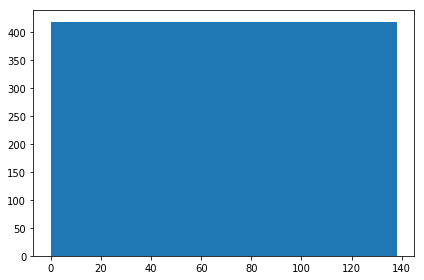

In [53]:
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
n_bins=139

print(Counter(y_final1))
axs.hist(y_final1,bins=n_bins)

(0.0, 48430.0)

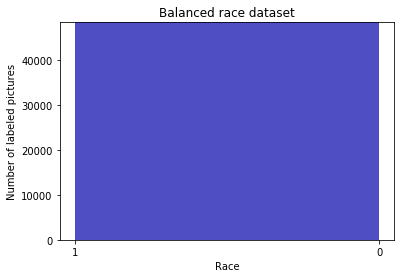

In [104]:
n, bins, patches = plt.hist(x=a, bins=2, color='#0504aa',
                            alpha=0.7)

plt.xlabel('Race')
plt.ylabel('Number of labeled pictures')
plt.title('Balanced race dataset')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [102]:
a=[]
for i in range(48427):
    a.append('1')
    a.append('0')

In [1440]:
with tf.Session() as sess:
    sess.run(init)
    train=[]
    test=[]
    for epoch in range(n_epochs):
        now=time.time()
        trainAccuracySum=0
        for iteration in range(len(X_train)//batch_size):
            startPositionForNextBatch= batch_size*iteration
            X_batch, y_batch=prepare_batch(batch_size ,startPositionForNextBatch ,X_train,y_train,pic_width,pic_height)
            trainAccuracySum+= sess.run([training_op, accuracy],feed_dict={X:X_batch,y:y_batch})[1]
            if(iteration%50==0):
                print("Iteration: ", iteration, "/",len(X_train)//batch_size)
                touple=output.eval(feed_dict={X:X_batch})[0],y_batch[0]
                print(touple[0].mean(),touple[0][int(touple[1])],time.time()-now)
                print("Accuracy so far ",trainAccuracySum/(iteration+1))
                
        testAccuracySum=0
        for i in range(len(X_test)//batch_size):
            poze, labele=prepare_batch(batch_size ,i*batch_size ,X_test,y_test,pic_width,pic_height)
            testAccuracySum+=accuracy.eval(feed_dict={X:poze,y:labele})
            if(i%100==0):
                print("Iteration: ", i, "/",len(X_test)//batch_size)
        
        
        testAccuracy=testAccuracySum/(len(X_test)/batch_size)
        trainAccuracy=trainAccuracySum/(len(X_train)/batch_size)
        
        train.append(trainAccuracy)
        test.append(testAccuracy)
        print("Epoch: ", epoch, "Test Accuracy= ", testAccuracy, "Train Accuracy=", trainAccuracy, " with a time of:", time.time()-now)

        save_path=saver.save(sess,"./balansat1"+str(epoch)+".ckpt")
        if len(train)>11:
            if (train[-1]<train[-10]):
                break

Iteration:  0 / 42
3.8329644 27.465702 1.2563574314117432
Accuracy so far  0.0
Iteration:  0 / 10
Epoch:  0 Test Accuracy=  0.3441860454027043 Train Accuracy= 0.2724097822646462  with a time of: 51.65904688835144
Iteration:  0 / 42
-0.29010385 7.752991 1.2509689331054688
Accuracy so far  0.30000001192092896
Iteration:  0 / 10
Epoch:  1 Test Accuracy=  0.4186046567074088 Train Accuracy= 0.37718277194724786  with a time of: 22.35449242591858
Iteration:  0 / 42
-0.8858945 10.178526 0.3942439556121826
Accuracy so far  0.44999998807907104
Iteration:  0 / 10
Epoch:  2 Test Accuracy=  0.4604651179424552 Train Accuracy= 0.44237485760443424  with a time of: 18.53994083404541
Iteration:  0 / 42
-0.98840225 9.482455 0.38967227935791016
Accuracy so far  0.550000011920929
Iteration:  0 / 10
Epoch:  3 Test Accuracy=  0.46046511517014616 Train Accuracy= 0.5203725298708337  with a time of: 19.486470460891724
Iteration:  0 / 42
-1.2421507 10.650523 0.4021337032318115
Accuracy so far  0.6499999761581421

In [ ]:
a=[]
with tf.Session() as sess:
    saver.restore(sess,"./convolutionalaToate57.ckpt")
    testAccuracySum=0
    for i in range(len(X_test)//batch_size):
            poze, labele=prepare_batch(batch_size ,i*batch_size ,X_test,y_test,pic_width,pic_height)
            print(X_Normalized.eval(feed_dict={X:poze,y:labele}))
#             for picture in batch:
#                 ind = np.argmax(picture)
#                 a.append(ind)

In [ ]:
Epoch:  0 Test Accuracy=  0.03181980645785513 Train Accuracy= 0.024045767012660216  with a time of: 533.1380293369293
Epoch:  1 Test Accuracy=  0.04004290281479641 Train Accuracy= 0.038795029577838515  with a time of: 546.125049591064
Epoch:  2 Test Accuracy=  0.04647836947535932 Train Accuracy= 0.05086260815529409  with a time of: 532.0206983089447
Epoch:  3 Test Accuracy=  0.0436181619411756 Train Accuracy= 0.06252793409379853  with a time of: 525.010951757431  
Epoch:  4 Test Accuracy=  0.05166249514201474 Train Accuracy= 0.07745597555319648  with a time of: 517.8365206718445
Epoch:  5 Test Accuracy=  0.05237754733355974 Train Accuracy= 0.08952355409735188  with a time of: 550.10799741745
Epoch:  6 Test Accuracy=  0.05362888772811769 Train Accuracy= 0.10686511139878162  with a time of: 693.866245508194
Epoch:  7 Test Accuracy=  0.05398641380724159 Train Accuracy= 0.12340216344728422  with a time of: 612.8364889621735
Epoch:  8 Test Accuracy=  0.055952806193561355 Train Accuracy= 0.1401179942568058  with a time of: 488.65868377685547
Epoch:  9 Test Accuracy=  0.059170539840166174 Train Accuracy= 0.1573254670899505  with a time of: 488.19111680984497
Epoch:  10 Test Accuracy=  0.058813013761042275 Train Accuracy= 0.17292392985014318  with a time of: 488.49968552589417
Epoch:  11 Test Accuracy=  0.056667858218620366 Train Accuracy= 0.19683561354337434  with a time of: 487.8555109500885
Epoch:  12 Test Accuracy=  0.054522702742792854 Train Accuracy= 0.21971931721496657  with a time of: 495.15245294570923

In [ ]:
X_final

In [ ]:
y_final

In [ ]:
io.imshow(X_final[200])

In [ ]:
X_final[200]

In [ ]:
y_races[y_final[200]]

In [32]:
train

[0.02243675732765524,
 0.04402431477165269,
 0.06114239865968766,
 0.08594797711206353,
 0.11347993448092937,
 0.15173862815033795,
 0.1949584368681944,
 0.2375525190408624,
 0.28144274839351013,
 0.32716546180693257,
 0.36917851257297046,
 0.41659962508770504,
 0.470635560416521,
 0.5155537691714244,
 0.5522034515124645,
 0.5972557441312548,
 0.6474479305911471,
 0.685796012739463,
 0.7183784748611304,
 0.740144811500714,
 0.7619558424330316,
 0.7796996528196347,
 0.7984267463843496,
 0.8106284091670188,
 0.8243496919686346,
 0.8319477967520315,
 0.8484401527695311,
 0.8588987208994078,
 0.8669884671386598,
 0.8762402765508139,
 0.8809332234552358,
 0.8905872849385732,
 0.897246800223869,
 0.9060963567656358,
 0.9131134299093014,
 0.9208009233314464,
 0.9278179969546344,
 0.9338070904696031,
 0.9390363740550189,
 0.9406453842045613,
 0.9450254681560707,
 0.9512380365712868,
 0.9540091106396551,
 0.9585232792542555,
 0.962948058324343,
 0.9611155739671968,
 0.9618306893109743]

In [33]:
test

[0.04129424456787996,
 0.04379692616944744,
 0.053628889093302726,
 0.05917054102554635,
 0.06292456328804935,
 0.06453343003476822,
 0.06363961524651397,
 0.06596353369863876,
 0.062030748619665024,
 0.059885592944054336,
 0.05791920033797308,
 0.058097963314270355,
 0.05899177822239449,
 0.057561674425335156,
 0.05720414843278397,
 0.05559528173934063,
 0.05470146692444863,
 0.05416517795560016,
 0.056846622493508296,
 0.052198785522664326,
 0.050947444621988996,
 0.049159815098756034,
 0.05166249662041025,
 0.05202002250641041,
 0.05398641516576719,
 0.054880229860789276,
 0.05631033367116749,
 0.056131570601638064,
 0.05470146692444863,
 0.05756167429214638,
 0.05559528169938399,
 0.053628889093302726,
 0.05899177802261132,
 0.054880229914064785,
 0.05452270405470239,
 0.05791920028469756,
 0.054165177982237925,
 0.05648909655423262,
 0.05416517800887568,
 0.05809796318108157,
 0.054165178062151195,
 0.05988559291741658,
 0.057919200324654196,
 0.06060064480928681,
 0.0591705410255